<a href="https://colab.research.google.com/github/DanieGS/Proyectos-Python/blob/main/Clasificaci%C3%B3n_y_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Análisis exploratorio de datos

La lógica de cada decisión tomada durante este proyecto viene explicada a detalle en el siguiente documento: https://docs.google.com/document/d/1Cb_U94Sh-kxuulT-dWc9xyw-K61E7P5dK3jKcENrDmE/edit?usp=sharing

##Carga de datos

In [ ]:
import gdown
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
# URLs de los archivos en Google Drive
url_info_01 = "https://drive.google.com/uc?id=10IENFEZx2yhxubqaKyfojelSnv3x4CHF"
url_info_02 = "https://drive.google.com/uc?id=1E-X6ktgkWD-OGHg3qeurOiBdLRLqlXTi"

# Descargar los archivos usando gdown
output_info_01 = "info_01.csv"
output_info_02 = "info_02.csv"

gdown.download(url_info_01, output_info_01, quiet=False)
gdown.download(url_info_02, output_info_02, quiet=False)

# Cargar los archivos CSV con pandas
df_01 = pd.read_csv(output_info_01)
df_02 = pd.read_csv(output_info_02)

Downloading...
From: https://drive.google.com/uc?id=10IENFEZx2yhxubqaKyfojelSnv3x4CHF
To: /content/info_01.csv
100%|██████████| 699k/699k [00:00<00:00, 16.3MB/s]
Downloading...
From: https://drive.google.com/uc?id=1E-X6ktgkWD-OGHg3qeurOiBdLRLqlXTi
To: /content/info_02.csv
100%|██████████| 681k/681k [00:00<00:00, 25.0MB/s]


##Limpieza de datos

In [ ]:
df_01.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17286 entries, 0 to 17285
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      17286 non-null  int64  
 1   id2     17286 non-null  int64  
 2   v4      17286 non-null  float64
 3   v5      17286 non-null  float64
 4   v6      17286 non-null  float64
dtypes: float64(3), int64(2)
memory usage: 675.4 KB


In [ ]:
df_01.head(10)

,id,id2,v4,v5,v6
0,1,1,721.2,27.3,0.004793
1,1,1,721.2,27.3,0.004793
2,2,2,714.0,27.3,0.004783
3,2,2,714.0,27.3,0.004783
4,3,3,713.5,27.2,0.004779
5,3,3,713.5,27.2,0.004779
6,4,4,708.2,27.2,0.004772
7,4,4,708.2,27.2,0.004772
8,5,5,704.5,27.2,0.004757
9,5,5,704.5,27.2,0.004757


In [ ]:
df_02.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17286 entries, 0 to 17285
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      17286 non-null  int64  
 1   id2     17286 non-null  int64  
 2   v1      17286 non-null  float64
 3   c1      17286 non-null  int64  
 4   v2      17286 non-null  float64
 5   v3      16286 non-null  object 
dtypes: float64(2), int64(3), object(1)
memory usage: 810.4+ KB


In [ ]:
df_02.head(10)

,id,id2,v1,c1,v2,v3
0,1,1,426.0,1,23.2,2015-02-04 17:51:00
1,1,1,426.0,1,23.2,2015-02-04 17:51:00
2,2,2,429.5,1,23.1,2015-02-04 17:51:59
3,2,2,429.5,1,23.1,2015-02-04 17:51:59
4,3,3,426.0,1,23.1,2015-02-04 17:53:00
5,3,3,426.0,1,23.1,2015-02-04 17:53:00
6,4,4,426.0,1,23.1,2015-02-04 17:54:00
7,4,4,426.0,1,23.1,2015-02-04 17:54:00
8,5,5,426.0,1,23.1,2015-02-04 17:55:00
9,5,5,426.0,1,23.1,2015-02-04 17:55:00


In [ ]:
# Verificar si los IDs son los mismos
df_01[['id', 'id2']].equals(df_02[['id', 'id2']])

True

In [ ]:
df_01 = df_01.drop(columns=['id2'])
df_02 = df_02.drop(columns=['id2'])

df_01 = df_01.drop_duplicates()
df_02 = df_02.drop_duplicates()

In [ ]:
print(f"\nNúmero de filas en info_01: {len(df_01)}")
print(f"Número de filas en info_02: {len(df_02)}")


Número de filas en info_01: 8143
Número de filas en info_02: 9143


In [ ]:
#Verificación sobre esas 1000 filas sobrantes
df_02_copia = df_02.copy()
df_02_copia.drop(columns=['v3'], inplace=True)
df_02_copia = df_02_copia.drop_duplicates()

df_02_copia.info()


<class 'pandas.core.frame.DataFrame'>
Index: 8143 entries, 0 to 16284
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      8143 non-null   int64  
 1   v1      8143 non-null   float64
 2   c1      8143 non-null   int64  
 3   v2      8143 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 318.1 KB


In [ ]:
#como última verificación:
df_01[['id']].equals(df_02_copia[['id']])

True

In [ ]:
# Eliminar las filas con valores nulos en la columna 'v3', ya que se ha verificado que están duplicadas
df_02 = df_02.dropna(subset=['v3'])
df_02.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8143 entries, 0 to 16284
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      8143 non-null   int64  
 1   v1      8143 non-null   float64
 2   c1      8143 non-null   int64  
 3   v2      8143 non-null   float64
 4   v3      8143 non-null   object 
dtypes: float64(2), int64(2), object(1)
memory usage: 381.7+ KB


In [ ]:
df = pd.merge(df_01, df_02, on='id', how='inner')
column_order = ['id', 'v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'c1']
df = df[column_order]

In [ ]:
df.set_index('id', inplace=True)
df.head(10)

,v1,v2,v3,v4,v5,v6,c1
id,,,,,,,
1,426.0,23.2,2015-02-04 17:51:00,721.2,27.3,0.004793,1
2,429.5,23.1,2015-02-04 17:51:59,714.0,27.3,0.004783,1
3,426.0,23.1,2015-02-04 17:53:00,713.5,27.2,0.004779,1
4,426.0,23.1,2015-02-04 17:54:00,708.2,27.2,0.004772,1
5,426.0,23.1,2015-02-04 17:55:00,704.5,27.2,0.004757,1
6,419.0,23.1,2015-02-04 17:55:59,701.0,27.2,0.004757,1
7,419.0,23.1,2015-02-04 17:57:00,701.7,27.2,0.004757,1
8,419.0,23.1,2015-02-04 17:57:59,699.0,27.2,0.004757,1
9,419.0,23.1,2015-02-04 17:58:59,689.3,27.2,0.004757,1


##Análisis de estadísticas

In [ ]:
# Convertir la columna 'v3' a tipo datetime
df['v3'] = pd.to_datetime(df['v3'])

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8143 entries, 1 to 8143
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   v1      8143 non-null   float64       
 1   v2      8143 non-null   float64       
 2   v3      8143 non-null   datetime64[ns]
 3   v4      8143 non-null   float64       
 4   v5      8143 non-null   float64       
 5   v6      8143 non-null   float64       
 6   c1      8143 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 508.9 KB


In [ ]:
#Descomponer v3 para convertirla a numérica
df['v3_day'] = df['v3'].dt.day
df['v3_month'] = df['v3'].dt.month
df['v3_year'] = df['v3'].dt.year
df['v3_hour'] = df['v3'].dt.hour
df['v3_minute'] = df['v3'].dt.minute
df['v3_second'] = df['v3'].dt.second

In [ ]:
# Identificar columnas con un solo valor único
single_value_columns = df.columns[df.nunique() == 1]
print("Columnas con un único valor:", single_value_columns)

Columnas con un único valor: Index(['v3_month', 'v3_year'], dtype='object')


In [ ]:
df.drop(columns=['v3'], inplace=True)
df.drop(columns=['v3_year', 'v3_month'], inplace=True)

In [ ]:
column_order = ['v1', 'v2', 'v3_day',	'v3_hour',	'v3_minute',	'v3_second', 'v4', 'v5', 'v6', 'c1']
df = df[column_order]
df

,v1,v2,v3_day,v3_hour,v3_minute,v3_second,v4,v5,v6,c1
id,,,,,,,,,,
1,426.0,23.2,4,17,51,0,721.2,27.3,0.004793,1
2,429.5,23.1,4,17,51,59,714.0,27.3,0.004783,1
3,426.0,23.1,4,17,53,0,713.5,27.2,0.004779,1
4,426.0,23.1,4,17,54,0,708.2,27.2,0.004772,1
5,426.0,23.1,4,17,55,0,704.5,27.2,0.004757,1
...,...,...,...,...,...,...,...,...,...,...
8139,433.0,21.1,10,9,29,0,787.2,36.1,0.005579,1
8140,433.0,21.1,10,9,29,59,789.5,36.0,0.005563,1
8141,433.0,21.1,10,9,30,59,798.5,36.1,0.005596,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8143 entries, 1 to 8143
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   v1         8143 non-null   float64
 1   v2         8143 non-null   float64
 2   v3_day     8143 non-null   int32  
 3   v3_hour    8143 non-null   int32  
 4   v3_minute  8143 non-null   int32  
 5   v3_second  8143 non-null   int32  
 6   v4         8143 non-null   float64
 7   v5         8143 non-null   float64
 8   v6         8143 non-null   float64
 9   c1         8143 non-null   int64  
dtypes: float64(5), int32(4), int64(1)
memory usage: 572.6 KB


In [ ]:
df.describe()

,v1,v2,v3_day,v3_hour,v3_minute,v3_second,v4,v5,v6,c1
count,8143.000000,8143.000000,8143.000000,8143.000000,8143.000000,8143.000000,8143.000000,8143.000000,8143.000000,8143.000000
mean,119.519403,20.619821,7.075525,11.390642,29.494290,18.360064,606.546359,25.731229,0.003863,0.212330
std,194.755878,1.017464,1.674896,7.092195,17.314343,27.317457,314.320229,5.531708,0.000852,0.408982
min,0.000000,19.000000,4.000000,0.000000,0.000000,0.000000,412.800000,16.700000,0.002674,0.000000
25%,0.000000,19.700000,6.000000,5.000000,14.000000,0.000000,439.000000,20.200000,0.003078,0.000000
50%,0.000000,20.400000,7.000000,11.000000,29.000000,0.000000,453.500000,26.200000,0.003801,0.000000
75%,256.400000,21.400000,8.000000,18.000000,44.000000,59.000000,638.850000,30.500000,0.004352,0.000000
max,1546.300000,23.200000,10.000000,23.000000,59.000000,59.000000,2028.500000,39.100000,0.006476,1.000000


##Visualización gráfica

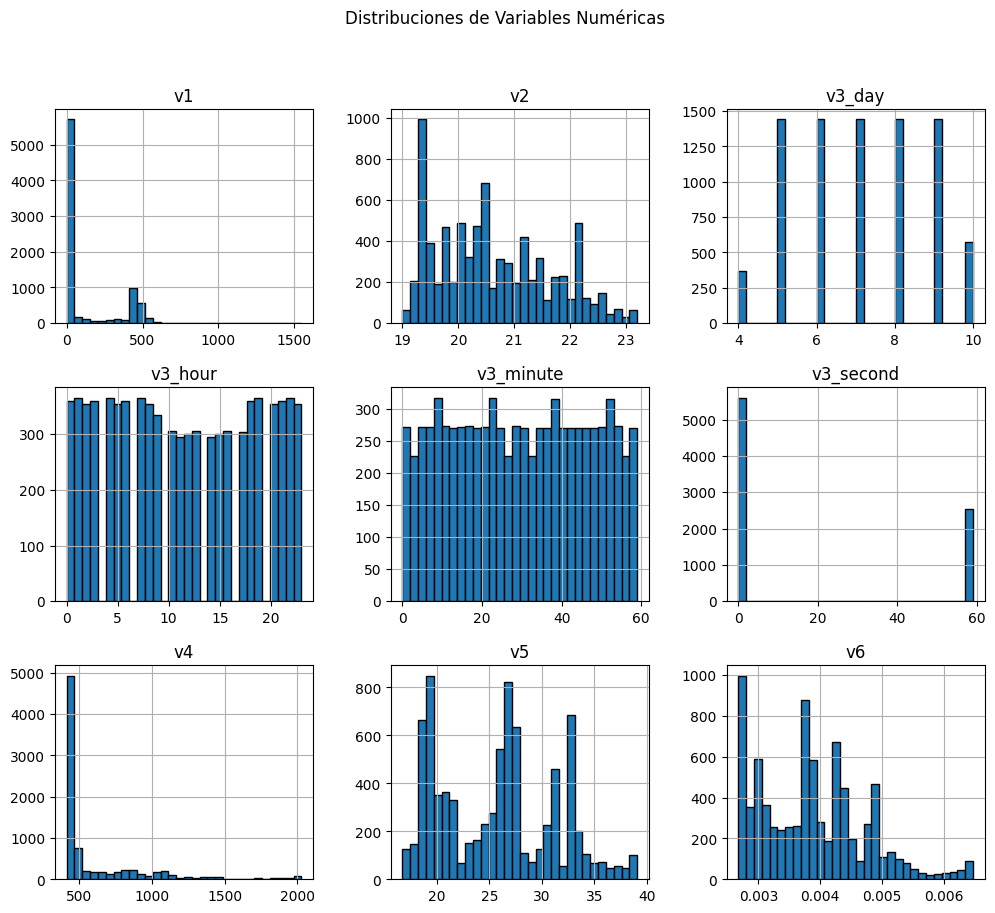

In [ ]:
variables = df.drop(columns=['c1']).columns
df[variables].hist(figsize=(12, 10), bins=30, edgecolor='black')
plt.suptitle('Distribuciones de Variables Numéricas')
plt.show()

In [ ]:
df["c1"].value_counts()

c1
0    6414
1    1729
Name: count, dtype: int64

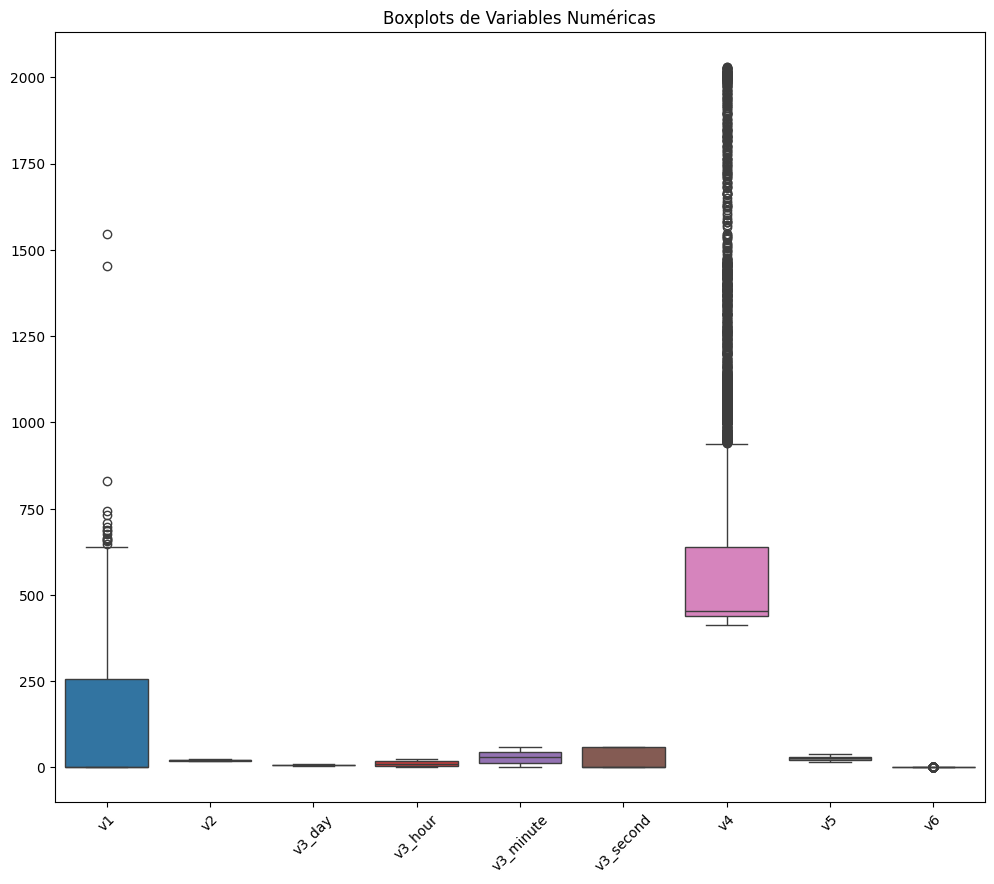

In [ ]:
# Crear boxplots para todas las columnas numéricas
plt.figure(figsize=(12, 10))
sns.boxplot(data=df[variables])
plt.title('Boxplots de Variables Numéricas')
plt.xticks(rotation=45)
plt.show()

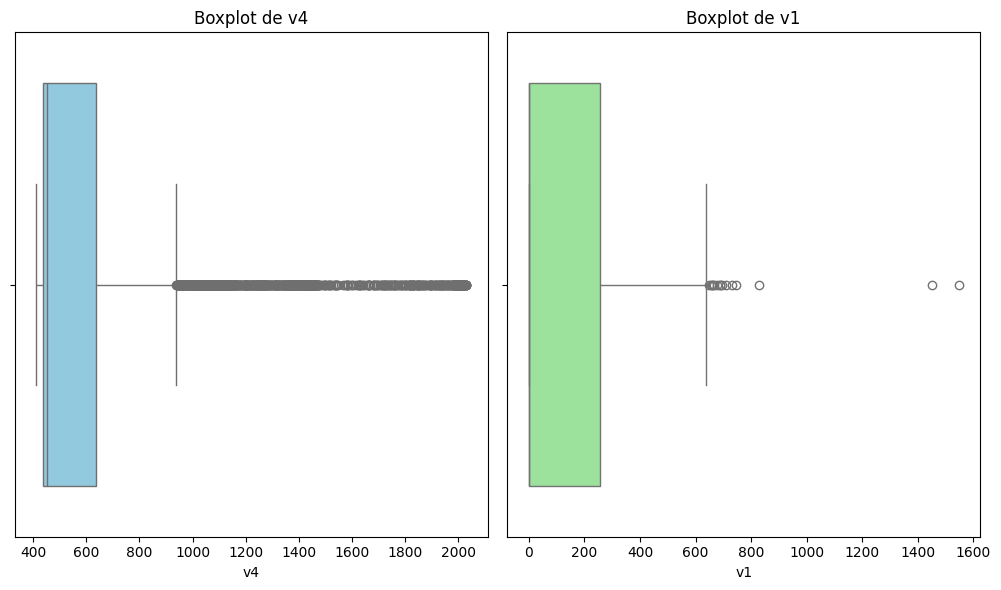

In [ ]:
plt.figure(figsize=(10, 6))

# Boxplot para v4
plt.subplot(1, 2, 1)  # Primera posición en una fila de 1x2 subgráficos
sns.boxplot(x=df['v4'], color='skyblue')
plt.title('Boxplot de v4')
plt.xlabel('v4')

# Boxplot para v1
plt.subplot(1, 2, 2)  # Segunda posición en una fila de 1x2 subgráficos
sns.boxplot(x=df['v1'], color='lightgreen')
plt.title('Boxplot de v1')
plt.xlabel('v1')

plt.tight_layout()  # Ajusta automáticamente el espaciado entre los subgráficos
plt.show()

In [ ]:
corr_matrix = df.corr()
corr_matrix["c1"].sort_values(ascending=False)

c1           1.000000
v1           0.907352
v4           0.712235
v2           0.537776
v6           0.300282
v5           0.132871
v3_hour      0.079630
v3_minute    0.015929
v3_second   -0.001325
v3_day      -0.109835
Name: c1, dtype: float64

In [ ]:
corr_matrix

,v1,v2,v3_day,v3_hour,v3_minute,v3_second,v4,v5,v6,c1
v1,1.000000,0.649623,-0.133959,0.084507,0.024375,0.001605,0.664022,0.037768,0.230420,0.907352
v2,0.649623,1.000000,-0.476823,0.259776,-0.003500,0.000332,0.559672,-0.142127,0.151410,0.537776
v3_day,-0.133959,-0.476823,1.000000,-0.229633,-0.008542,-0.000852,0.082218,0.623349,0.474664,-0.109835
v3_hour,0.084507,0.259776,-0.229633,1.000000,0.003630,0.002510,0.209670,0.017036,0.096271,0.079630
v3_minute,0.024375,-0.003500,-0.008542,0.003630,1.000000,0.027492,-0.002828,-0.003546,-0.004677,0.015929
v3_second,0.001605,0.000332,-0.000852,0.002510,0.027492,1.000000,-0.000574,0.000205,0.000387,-0.001325
v4,0.664022,0.559672,0.082218,0.209670,-0.002828,-0.000574,1.000000,0.438945,0.626556,0.712235
v5,0.037768,-0.142127,0.623349,0.017036,-0.003546,0.000205,0.438945,1.000000,0.955164,0.132871
v6,0.230420,0.151410,0.474664,0.096271,-0.004677,0.000387,0.626556,0.955164,1.000000,0.300282
c1,0.907352,0.537776,-0.109835,0.079630,0.015929,-0.001325,0.712235,0.132871,0.300282,1.000000


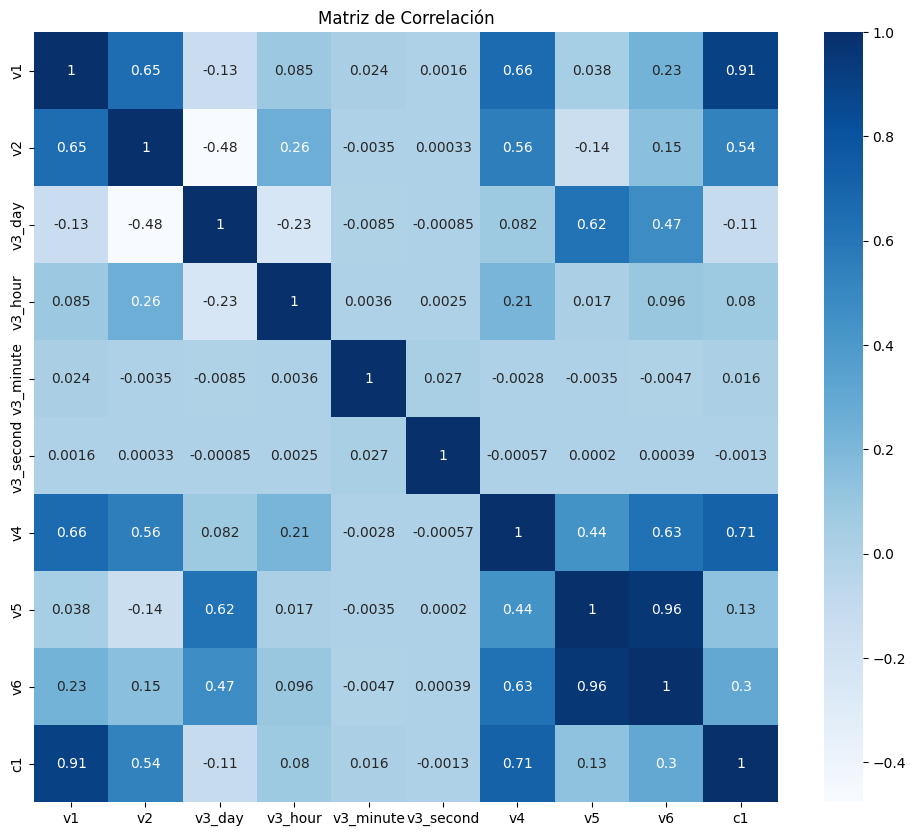

In [ ]:
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='Blues')
plt.title('Matriz de Correlación')
plt.show()

In [ ]:
spearman_corr_matrix = df.corr(method='spearman')
spearman_corr_matrix["c1"].sort_values(ascending=False)

c1           1.000000
v1           0.804645
v4           0.656651
v2           0.532822
v6           0.255836
v5           0.128989
v3_hour      0.085940
v3_minute    0.015849
v3_second   -0.001325
v3_day      -0.114821
Name: c1, dtype: float64

In [ ]:
spearman_corr_matrix

,v1,v2,v3_day,v3_hour,v3_minute,v3_second,v4,v5,v6,c1
v1,1.000000,0.565480,-0.093456,0.115562,0.017808,0.000443,0.473103,0.006925,0.169057,0.804645
v2,0.565480,1.000000,-0.494488,0.264631,-0.001934,0.000482,0.636615,-0.193651,0.104722,0.532822
v3_day,-0.093456,-0.494488,1.000000,-0.211396,-0.007921,-0.000784,-0.068990,0.620237,0.432434,-0.114821
v3_hour,0.115562,0.264631,-0.211396,1.000000,0.003436,0.002565,0.227601,0.039854,0.093231,0.085940
v3_minute,0.017808,-0.001934,-0.007921,0.003436,1.000000,0.029270,-0.003814,-0.003877,-0.003809,0.015849
v3_second,0.000443,0.000482,-0.000784,0.002565,0.029270,1.000000,-0.000116,0.000067,0.000328,-0.001325
v4,0.473103,0.636615,-0.068990,0.227601,-0.003814,-0.000116,1.000000,0.223423,0.378357,0.656651
v5,0.006925,-0.193651,0.620237,0.039854,-0.003877,0.000067,0.223423,1.000000,0.940285,0.128989
v6,0.169057,0.104722,0.432434,0.093231,-0.003809,0.000328,0.378357,0.940285,1.000000,0.255836
c1,0.804645,0.532822,-0.114821,0.085940,0.015849,-0.001325,0.656651,0.128989,0.255836,1.000000


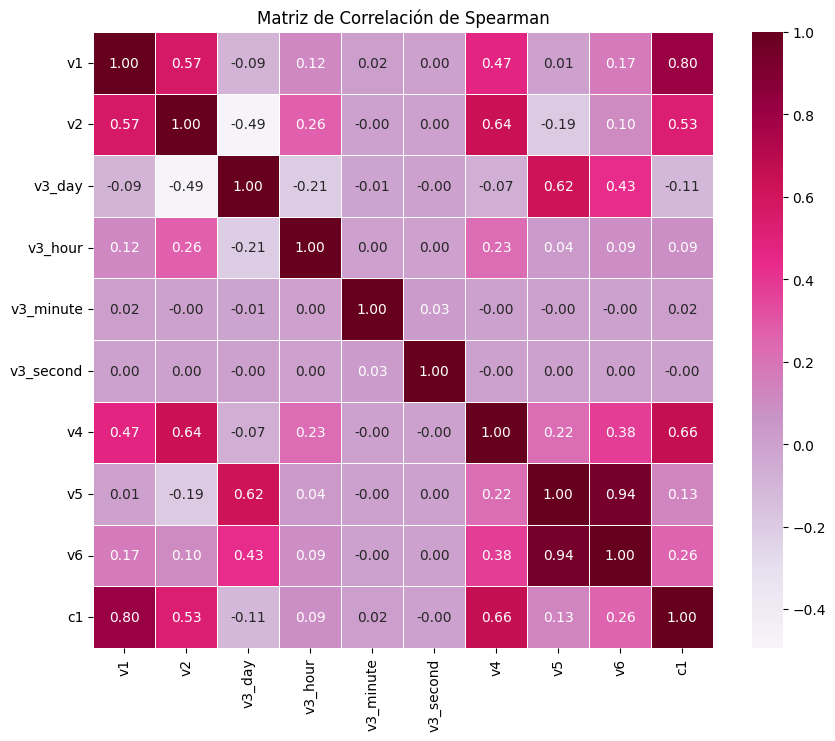

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(spearman_corr_matrix, annot=True, cmap='PuRd', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlación de Spearman')
plt.show()

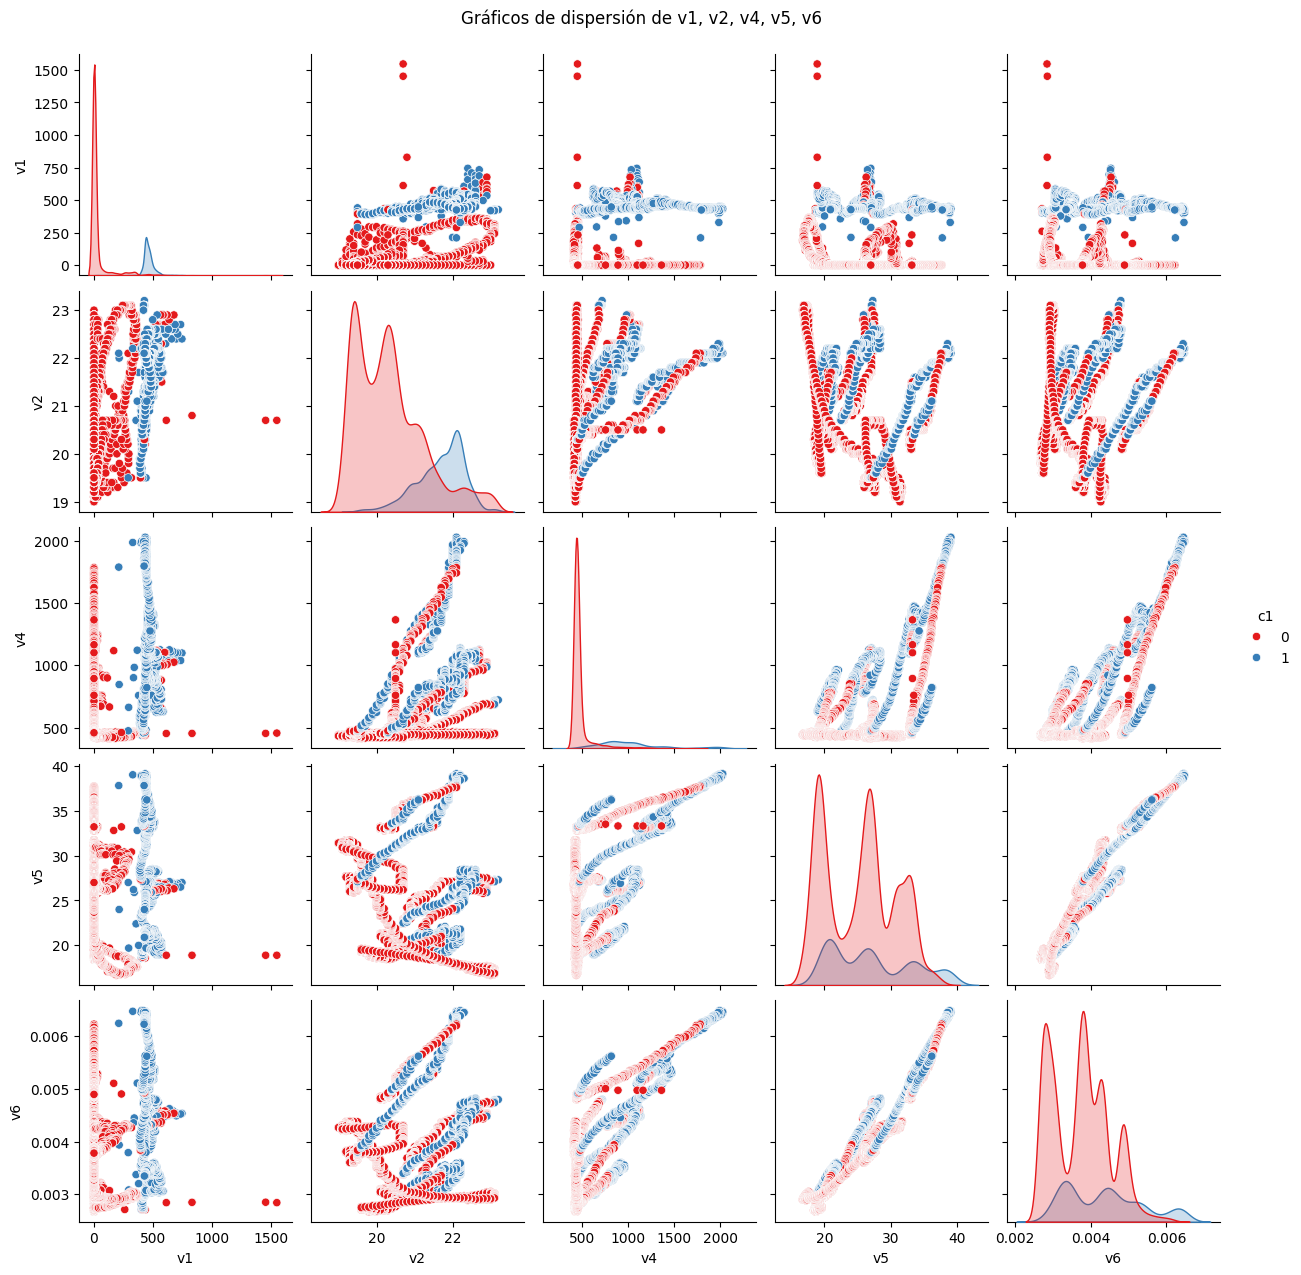

In [ ]:
#Ver distribución de c1 en diferentes pares de variables
df_subset= df[['c1', 'v1', 'v2', 'v4', 'v5', 'v6']]
sns.pairplot(df_subset, hue='c1', diag_kind='kde', palette="Set1")
plt.suptitle('Gráficos de dispersión de v1, v2, v4, v5, v6 ', y=1.02)
plt.show()

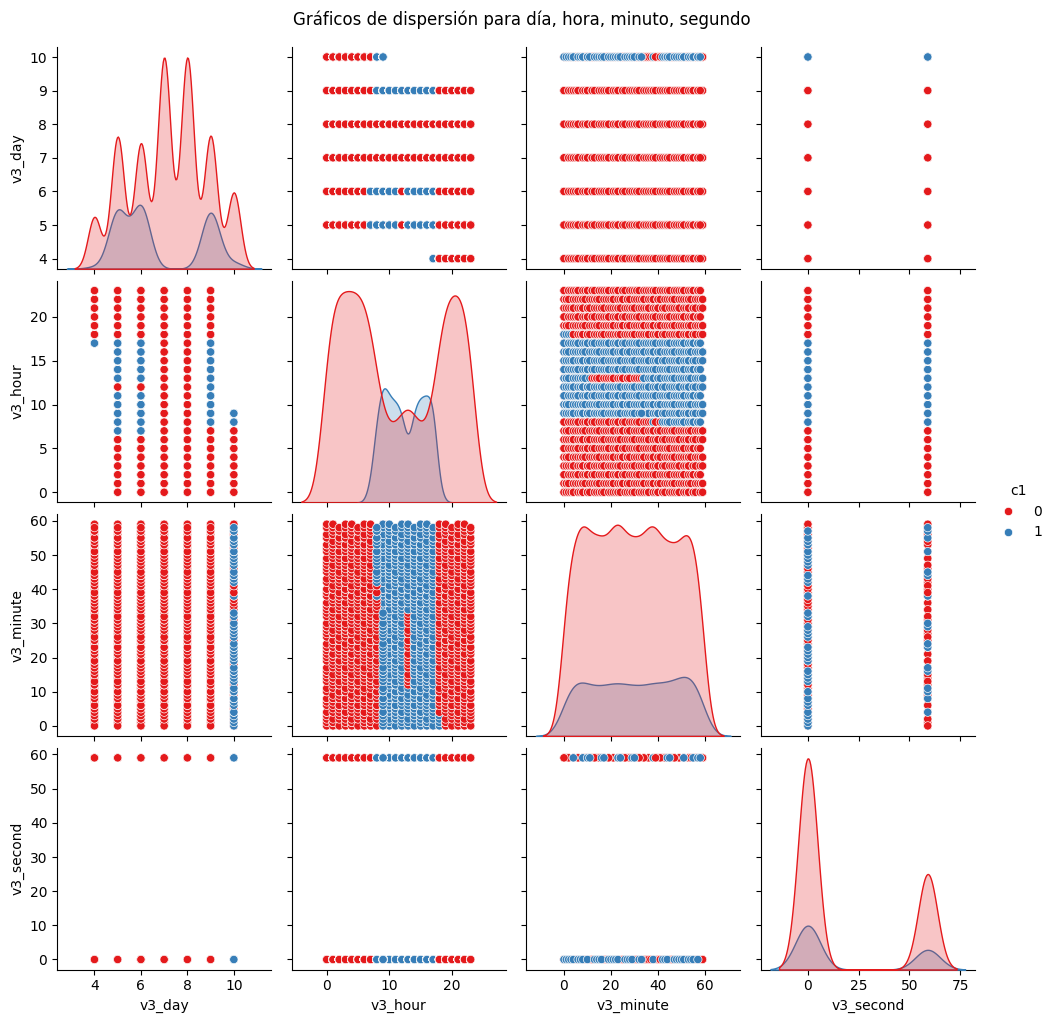

In [ ]:
df_subset2= df[['c1', 'v3_day', 'v3_hour', 'v3_minute', 'v3_second']]
sns.pairplot(df_subset2, hue='c1', diag_kind='kde', palette="Set1")
plt.suptitle('Gráficos de dispersión para día, hora, minuto, segundo', y=1.02)
plt.show()

##Tratamiento de outliers

In [ ]:
df_transformed = df.copy()

In [ ]:
#Trandormación logarítmica y añadir como nueva columna
df_transformed['v1_log'] = np.log(df_transformed['v1'] + 1)
df_transformed['v4_log'] = np.log(df_transformed['v4'] + 1)

#Calcular los límites para el capping
v1_lower, v1_upper = df_transformed['v1'].quantile([0.01, 0.99])
v4_lower, v4_upper = df_transformed['v4'].quantile([0.01, 0.99])

#Aplicr y añadir capping
df_transformed['v1_capped'] = df_transformed['v1'].clip(v1_lower, v1_upper)
df_transformed['v4_capped'] = df_transformed['v4'].clip(v4_lower, v4_upper)

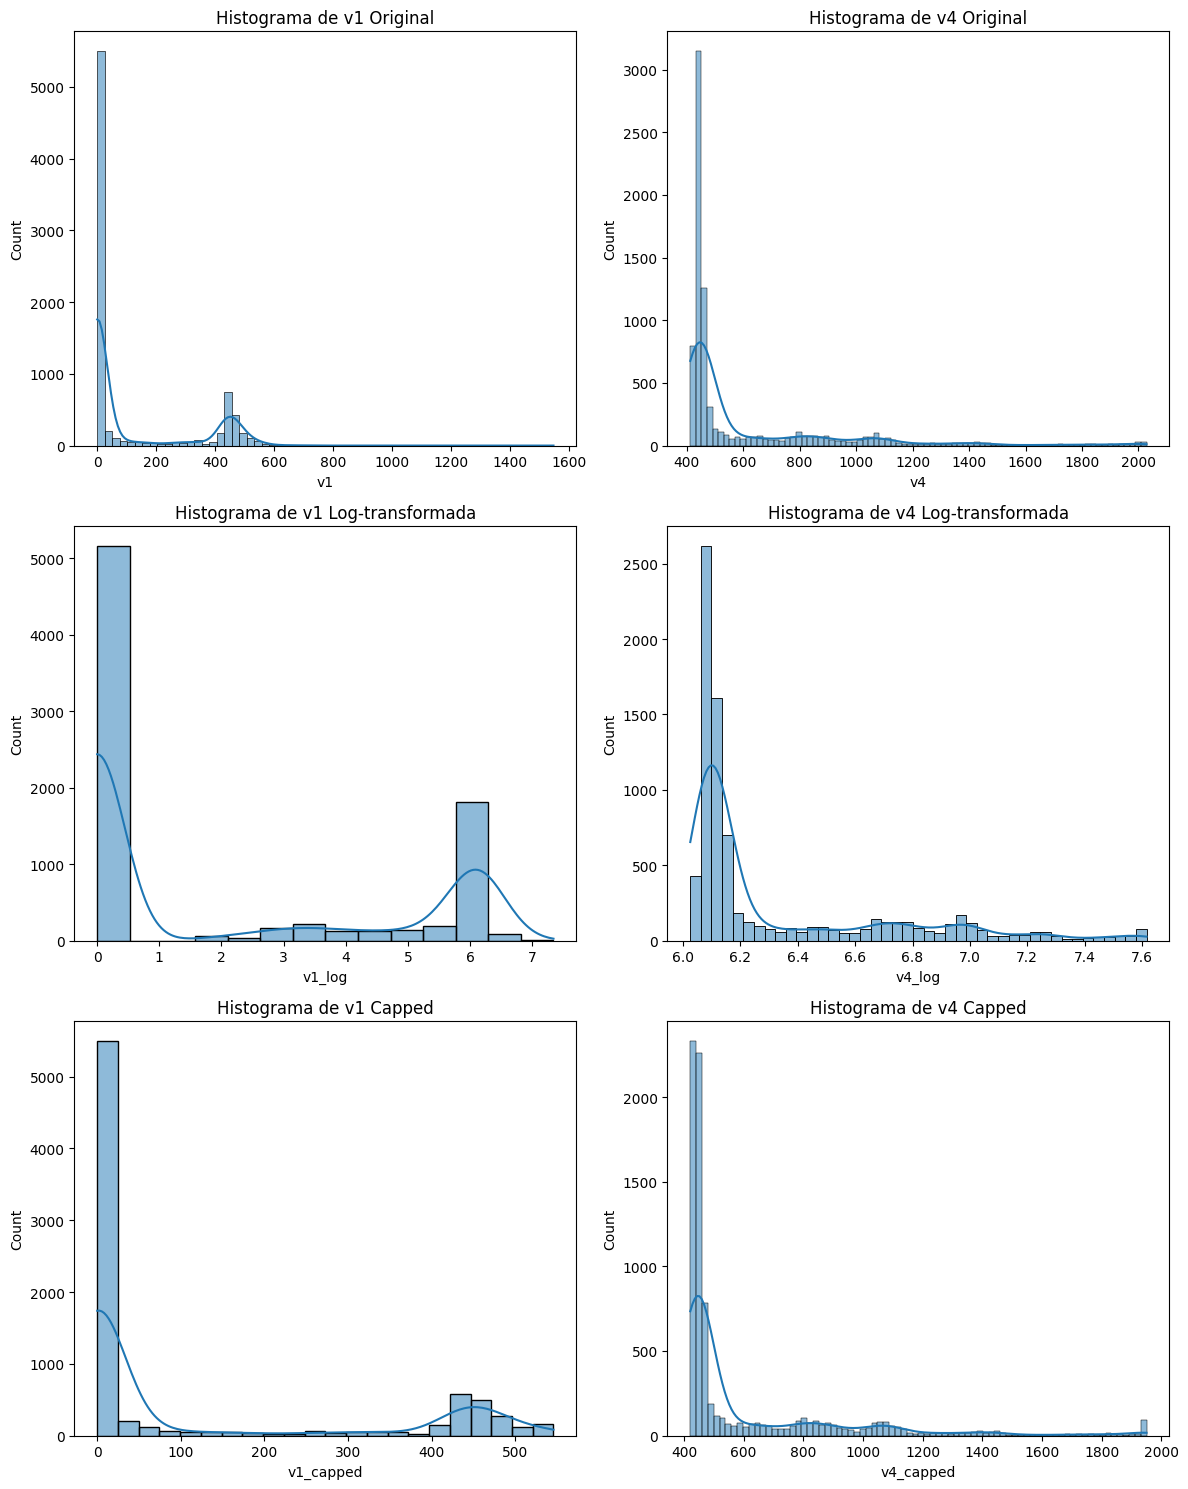

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 15))

# Distribuciones originales
plt.subplot(3, 2, 1)
sns.histplot(df_transformed['v1'], kde=True)
plt.title('Histograma de v1 Original')

plt.subplot(3, 2, 2)
sns.histplot(df_transformed['v4'], kde=True)
plt.title('Histograma de v4 Original')

# Transformaciones logarítmicas
plt.subplot(3, 2, 3)
sns.histplot(df_transformed['v1_log'], kde=True)
plt.title('Histograma de v1 Log-transformada')

plt.subplot(3, 2, 4)
sns.histplot(df_transformed['v4_log'], kde=True)
plt.title('Histograma de v4 Log-transformada')

# Capping
plt.subplot(3, 2, 5)
sns.histplot(df_transformed['v1_capped'], kde=True)
plt.title('Histograma de v1 Capped')

plt.subplot(3, 2, 6)
sns.histplot(df_transformed['v4_capped'], kde=True)
plt.title('Histograma de v4 Capped')

plt.tight_layout()
plt.show()


In [ ]:
#Comparativa de las originales vs transformadas
df_transformed[['v1', 'v1_log', 'v1_capped', 'v4', 'v4_log', 'v4_capped']].describe()

,v1,v1_log,v1_capped,v4,v4_log,v4_capped
count,8143.000000,8143.000000,8143.000000,8143.000000,8143.000000,8143.000000
mean,119.519403,1.959727,118.845643,606.546359,6.321417,606.088579
std,194.755878,2.683436,192.567044,314.320229,0.380023,312.200758
min,0.000000,0.000000,0.000000,412.800000,6.025383,421.000000
25%,0.000000,0.000000,0.000000,439.000000,6.086775,439.000000
50%,0.000000,0.000000,0.000000,453.500000,6.119198,453.500000
75%,256.400000,5.550630,256.400000,638.850000,6.461234,638.850000
max,1546.300000,7.344267,545.674000,2028.500000,7.615545,1950.800000


In [ ]:
#Matriz de correlación con c1
df_transformed[['v1', 'v4','v1_capped', 'v4_capped', 'v1_log', 'v4_log', 'c1']].corr()

,v1,v4,v1_capped,v4_capped,v1_log,v4_log,c1
v1,1.000000,0.664022,0.996430,0.666028,0.928702,0.726286,0.907352
v4,0.664022,1.000000,0.669625,0.999888,0.581520,0.978311,0.712235
v1_capped,0.996430,0.669625,1.000000,0.671635,0.932982,0.732129,0.915519
v4_capped,0.666028,0.999888,0.671635,1.000000,0.583165,0.979698,0.714067
v1_log,0.928702,0.581520,0.932982,0.583165,1.000000,0.628815,0.806593
v4_log,0.726286,0.978311,0.732129,0.979698,0.628815,1.000000,0.771220
c1,0.907352,0.712235,0.915519,0.714067,0.806593,0.771220,1.000000


In [ ]:
column_order = ['v1_capped', 'v2', 'v3_day',	'v3_hour',	'v3_minute',	'v3_second', 'v4_log', 'v5', 'v6', 'c1']
df_transformed = df_transformed[column_order]
df_transformed

,v1_capped,v2,v3_day,v3_hour,v3_minute,v3_second,v4_log,v5,v6,c1
id,,,,,,,,,,
1,426.0,23.2,4,17,51,0,6.582302,27.3,0.004793,1
2,429.5,23.1,4,17,51,59,6.572283,27.3,0.004783,1
3,426.0,23.1,4,17,53,0,6.571583,27.2,0.004779,1
4,426.0,23.1,4,17,54,0,6.564138,27.2,0.004772,1
5,426.0,23.1,4,17,55,0,6.558907,27.2,0.004757,1
...,...,...,...,...,...,...,...,...,...,...
8139,433.0,21.1,10,9,29,0,6.669752,36.1,0.005579,1
8140,433.0,21.1,10,9,29,59,6.672666,36.0,0.005563,1
8141,433.0,21.1,10,9,30,59,6.683987,36.1,0.005596,1


##Estandarización

In [ ]:
df_scaled = df_transformed.copy()
features= df_scaled.drop(columns=['c1']).columns

In [ ]:
from sklearn.preprocessing import StandardScaler

#Crear el escalador
scaler = StandardScaler()
df_scaled[features] = scaler.fit_transform(df_scaled[features])
df_scaled.head()

,v1_capped,v2,v3_day,v3_hour,v3_minute,v3_second,v4_log,v5,v6,c1
id,,,,,,,,,,
1,1.595149,2.536049,-1.836361,0.790968,1.242151,-0.672141,0.686540,0.283613,1.091757,1
2,1.613326,2.437759,-1.836361,0.790968,1.242151,1.487782,0.660173,0.283613,1.080555,1
3,1.595149,2.437759,-1.836361,0.790968,1.357669,-0.672141,0.658332,0.265535,1.075888,1
4,1.595149,2.437759,-1.836361,0.790968,1.415429,-0.672141,0.638739,0.265535,1.066555,1
5,1.595149,2.437759,-1.836361,0.790968,1.473188,-0.672141,0.624973,0.265535,1.049523,1


In [ ]:
df_scaled.corr()

,v1_capped,v2,v3_day,v3_hour,v3_minute,v3_second,v4_log,v5,v6,c1
v1_capped,1.000000,0.653060,-0.133052,0.085685,0.023381,0.000676,0.732129,0.040021,0.233641,0.915519
v2,0.653060,1.000000,-0.476823,0.259776,-0.003500,0.000332,0.617865,-0.142127,0.151410,0.537776
v3_day,-0.133052,-0.476823,1.000000,-0.229633,-0.008542,-0.000852,0.012344,0.623349,0.474664,-0.109835
v3_hour,0.085685,0.259776,-0.229633,1.000000,0.003630,0.002510,0.230776,0.017036,0.096271,0.079630
v3_minute,0.023381,-0.003500,-0.008542,0.003630,1.000000,0.027492,-0.003799,-0.003546,-0.004677,0.015929
v3_second,0.000676,0.000332,-0.000852,0.002510,0.027492,1.000000,-0.000521,0.000205,0.000387,-0.001325
v4_log,0.732129,0.617865,0.012344,0.230776,-0.003799,-0.000521,1.000000,0.389201,0.589454,0.771220
v5,0.040021,-0.142127,0.623349,0.017036,-0.003546,0.000205,0.389201,1.000000,0.955164,0.132871
v6,0.233641,0.151410,0.474664,0.096271,-0.004677,0.000387,0.589454,0.955164,1.000000,0.300282
c1,0.915519,0.537776,-0.109835,0.079630,0.015929,-0.001325,0.771220,0.132871,0.300282,1.000000


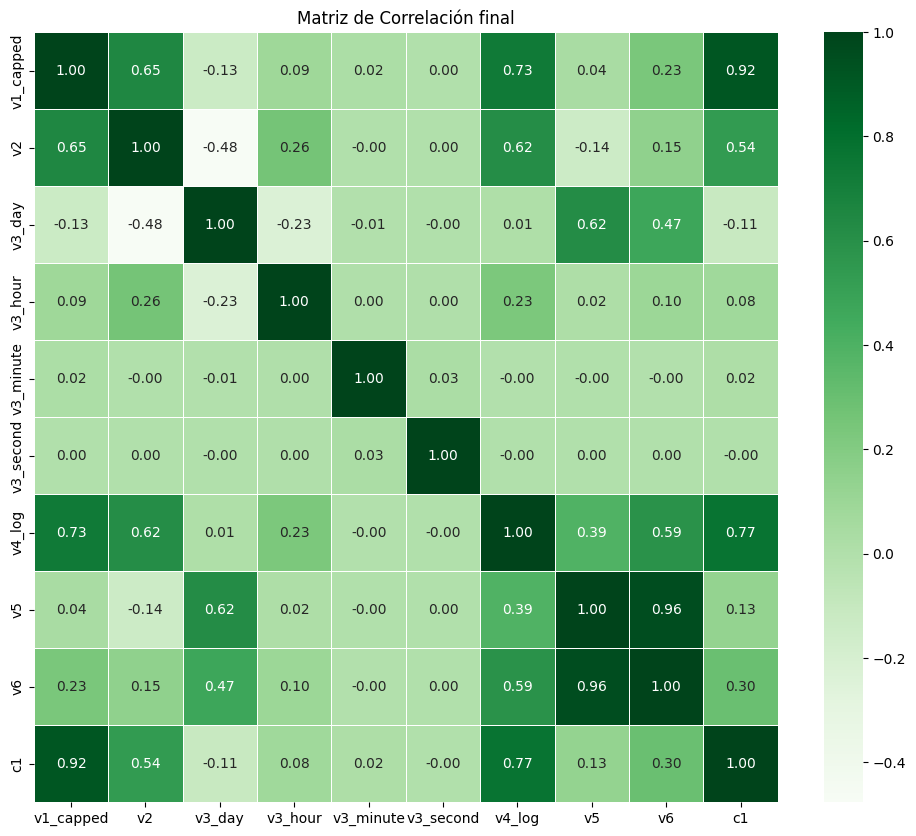

In [ ]:
correlation_matrix_scaled = df_scaled.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix_scaled, annot=True, fmt=".2f", cmap='Greens', linewidths=0.5)
plt.title('Matriz de Correlación final')
plt.show()


#Clasificación

###Funciones

In [ ]:
from sklearn.model_selection import train_test_split

def train_val_test_split(df, train_size=0.7, val_size=0.15, test_size=0.15, random_state=None):
    # División inicial en entrenamiento y el resto
    train_set, rest_set = train_test_split(df, train_size=train_size, random_state=random_state)

    # Dividir el resto en validación y prueba
    val_set, test_set = train_test_split(rest_set, test_size=0.5, random_state=random_state)

    return train_set, val_set, test_set

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score

def evaluate_model(model, X, y):
    #Predicciones del modelo
    y_pred = model.predict(X)

    #Calcular las métricas
    accuracy = accuracy_score(y, y_pred)
    precision = precision_score(y, y_pred, average='binary')  # Puedes cambiar 'binary' si tu caso no es binario
    recall = recall_score(y, y_pred, average='binary')
    f1 = f1_score(y, y_pred, average='binary')
    conf_matrix = confusion_matrix(y, y_pred)

    #Si es posible, calcula ROC-AUC
    try:
        y_proba = model.predict_proba(X)[:, 1]  # Esto fallará si el modelo no tiene predict_proba
        roc_auc = roc_auc_score(y, y_proba)
    except AttributeError:
        roc_auc = None

    #Guardar las métricas en un diccionario
    metrics = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'Confusion Matrix': conf_matrix,
        'ROC AUC': roc_auc
    }

    return metrics

##Pre-procesamiento de datos

In [ ]:
train_set, val_set, test_set = train_val_test_split(df, random_state=42)
train_transformed, val_transformed, test_transformed = train_val_test_split(df_transformed, random_state=42)
train_scaled, val_scaled, test_scaled = train_val_test_split(df_scaled, random_state=42)

In [ ]:
# Verificar los tamaños de los conjuntos resultantes
print("Tamaño del conjunto de entrenamiento:", len(train_set))
print("Tamaño del conjunto de validación:", len(val_set))
print("Tamaño del conjunto de prueba:", len(test_set))

Tamaño del conjunto de entrenamiento: 5700
Tamaño del conjunto de validación: 1221
Tamaño del conjunto de prueba: 1222


In [ ]:
#Separación para el dataframe original
X_train = train_set.drop(columns=["c1"])
y_train = train_set['c1']
X_val = val_set.drop(columns=["c1"])
y_val = val_set['c1']
X_test = test_set.drop(columns=["c1"])
y_test = test_set['c1']

#Separación para el dataframe transformado
X_train_transformed = train_transformed.drop(columns=["c1"])
y_train_transformed = train_transformed['c1']
X_val_transformed = val_transformed.drop(columns=["c1"])
y_val_transformed = val_transformed['c1']
X_test_transformed = test_transformed.drop(columns=["c1"])
y_test_transformed = test_transformed['c1']

#Separación para el dataframe escalado
X_train_scaled = train_scaled.drop(columns=["c1"])
y_train_scaled = train_scaled['c1']
X_val_scaled = val_scaled.drop(columns=["c1"])
y_val_scaled = val_scaled['c1']
X_test_scaled = test_scaled.drop(columns=["c1"])
y_test_scaled = test_scaled['c1']

##Árbol de decisión

In [ ]:
from sklearn.tree import DecisionTreeClassifier

#Crear instancias separadas del modelo
dt_original = DecisionTreeClassifier(random_state=42)
dt_transformed = DecisionTreeClassifier(random_state=42)
dt_scaled = DecisionTreeClassifier(random_state=42)

In [ ]:
#Entrenar cada modelo con su correspondiente conjunto de datos
dt_original.fit(X_train, y_train)
dt_transformed.fit(X_train_transformed, y_train_transformed)
dt_scaled.fit(X_train_scaled, y_train_scaled)

DecisionTreeClassifier(random_state=42)

In [ ]:
#Evaluar cada modelo con su correspondiente conjunto de datos
metrics_original_val_dt = evaluate_model(dt_original, X_val, y_val)
metrics_transformed_val_dt = evaluate_model(dt_transformed, X_val_transformed, y_val_transformed)
metrics_scaled_val_dt = evaluate_model(dt_scaled, X_val_scaled, y_val_scaled)

In [ ]:
#Agregar resultados al diccionario
evaluations = {
    'Decision Tree Validation': {
        'dt_original_val': metrics_original_val_dt,
        'dt_transformed_val': metrics_transformed_val_dt,
        'dt_scaled_val': metrics_scaled_val_dt
    }
}

In [ ]:
Results_dt_val = pd.DataFrame(evaluations['Decision Tree Validation']).transpose()
Results_dt_val

,Accuracy,Precision,Recall,F1 Score,Confusion Matrix,ROC AUC
dt_original_val,0.995086,0.988372,0.988372,0.988372,"[[960, 3], [3, 255]]",0.992628
dt_transformed_val,0.996724,0.988462,0.996124,0.992278,"[[960, 3], [1, 257]]",0.996504
dt_scaled_val,0.996724,0.988462,0.996124,0.992278,"[[960, 3], [1, 257]]",0.996504


In [ ]:
#Evaluación sobre el conjunto de pruebas
metrics_original_test_dt = evaluate_model(dt_original, X_test, y_test)
metrics_transformed_test_dt = evaluate_model(dt_transformed, X_test_transformed, y_test_transformed)
metrics_scaled_test_dt = evaluate_model(dt_scaled, X_test_scaled, y_test_scaled)

In [ ]:
#Guardar en el diccionario
evaluations['Decision Tree Test'] = {
    'dt_original_test': metrics_original_test_dt,
    'dt_transformed_test': metrics_transformed_test_dt,
    'dt_scaled_test': metrics_scaled_test_dt
}

In [ ]:
Results_dt_test = pd.DataFrame(evaluations['Decision Tree Test']).transpose()
Results_dt_test

,Accuracy,Precision,Recall,F1 Score,Confusion Matrix,ROC AUC
dt_original_test,0.993453,0.988327,0.980695,0.984496,"[[960, 3], [5, 254]]",0.98879
dt_transformed_test,0.994272,0.980916,0.992278,0.986564,"[[958, 5], [2, 257]]",0.993543
dt_scaled_test,0.994272,0.980916,0.992278,0.986564,"[[958, 5], [2, 257]]",0.993543


##Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_original = RandomForestClassifier(random_state=42)
rf_transformed = RandomForestClassifier(random_state=42)
rf_scaled = RandomForestClassifier(random_state=42)

In [ ]:
rf_original.fit(X_train, y_train)
rf_transformed.fit(X_train_transformed, y_train_transformed)
rf_scaled.fit(X_train_scaled, y_train_scaled)

RandomForestClassifier(random_state=42)

In [ ]:
#Evaluar en conjunto de validación
metrics_original_val_rf = evaluate_model(rf_original, X_val, y_val)
metrics_transformed_val_rf = evaluate_model(rf_transformed, X_val_transformed, y_val_transformed)
metrics_scaled_val_rf = evaluate_model(rf_scaled, X_val_scaled, y_val_scaled)

In [ ]:
# Guardar en el diccionario
evaluations['Random Forest Validation'] = {
    'rf_original_val': metrics_original_val_rf,
    'rf_transformed_val': metrics_transformed_val_rf,
    'dt_scaled_val': metrics_scaled_val_rf
}

In [ ]:
Results_rf_val = pd.DataFrame(evaluations['Random Forest Validation']).transpose()
Results_rf_val

,Accuracy,Precision,Recall,F1 Score,Confusion Matrix,ROC AUC
rf_original_val,0.997543,0.988506,1.0,0.99422,"[[960, 3], [0, 258]]",0.999972
rf_transformed_val,0.997543,0.992278,0.996124,0.994197,"[[961, 2], [1, 257]]",0.999962
dt_scaled_val,0.997543,0.992278,0.996124,0.994197,"[[961, 2], [1, 257]]",0.999962


In [ ]:
#Evaluar en conjunto de pruebas
metrics_original_test_rf = evaluate_model(rf_original, X_test, y_test)
metrics_transformed_test_rf = evaluate_model(rf_transformed, X_test_transformed, y_test_transformed)
metrics_scaled_test_rf = evaluate_model(rf_scaled, X_test_scaled, y_test_scaled)

In [ ]:
#Guardar en el diccionario
evaluations['Random Forest Test'] = {
    'rf_original_test': metrics_original_test_rf,
    'rf_transformed_test': metrics_transformed_test_rf,
    'dt_scaled_test': metrics_scaled_test_rf
}

In [ ]:
Results_rf_test = pd.DataFrame(evaluations['Random Forest Test']).transpose()
Results_rf_test

,Accuracy,Precision,Recall,F1 Score,Confusion Matrix,ROC AUC
rf_original_test,0.996727,0.988506,0.996139,0.992308,"[[960, 3], [1, 258]]",0.999934
rf_transformed_test,0.995908,0.988462,0.992278,0.990366,"[[960, 3], [2, 257]]",0.999934
dt_scaled_test,0.995908,0.988462,0.992278,0.990366,"[[960, 3], [2, 257]]",0.999934


##Support Vector Machine

###Selección de características

In [ ]:
#Importancia de las características con el conjunto original
importances = rf_original.feature_importances_
feature_names = X_train.columns

In [ ]:
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print(feature_importance_df)

     Feature  Importance
0         v1    0.544415
6         v4    0.212799
1         v2    0.123758
3    v3_hour    0.056098
8         v6    0.025967
7         v5    0.021409
4  v3_minute    0.007858
2     v3_day    0.006954
5  v3_second    0.000743


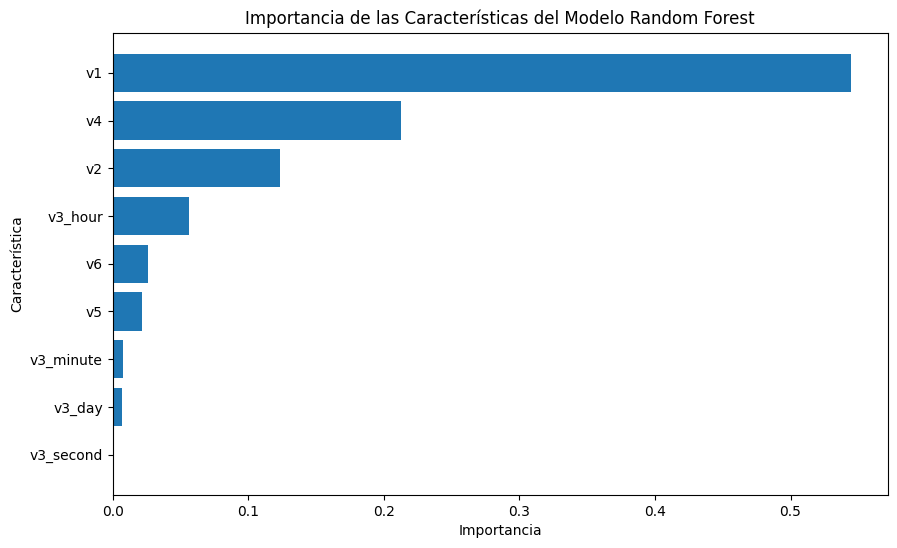

In [ ]:
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importancia')
plt.ylabel('Característica')
plt.title('Importancia de las Características del Modelo Random Forest')
plt.gca().invert_yaxis()
plt.show()

In [ ]:
X_train_scaled

,v1_capped,v2,v3_day,v3_hour,v3_minute,v3_second,v4_log,v5,v6
id,,,,,,,,,
2046,-0.617203,-0.216061,-0.642184,-1.183154,1.473188,1.487782,-0.688403,-1.234998,-1.251306
2933,-0.617203,0.373677,-0.642184,0.931977,0.722319,1.487782,0.312452,-1.036132,-0.930914
463,-0.617203,0.570256,-1.239273,-1.465171,0.202487,-0.672141,-0.614491,-0.114118,0.049331
1957,-0.617203,-0.117771,-0.642184,-1.324162,-0.201827,1.487782,-0.623468,-1.162683,-1.156382
2446,1.844429,0.766835,-0.642184,-0.196093,0.375764,-0.672141,1.104767,-0.819188,-0.632301
...,...,...,...,...,...,...,...,...,...
5227,-0.554883,-1.395537,0.551994,-0.478110,1.588706,-0.672141,-0.598410,0.970604,0.502203
5391,-0.521127,-1.493826,0.551994,-0.055084,0.664560,-0.672141,-0.641513,0.952526,0.439419
861,1.558796,0.373677,-1.239273,-0.478110,-1.125973,1.487782,0.213152,-0.367220,-0.258063


In [ ]:
#Selección de características más importantes
important_features_3 = ['v1_capped', 'v4_log', 'v2']
important_features_5 = ['v1_capped', 'v4_log', 'v2', 'v3_hour', 'v6']

#Crear subconjuntos con características seleccionadas
X_train_scaled_3 = X_train_scaled[important_features_3]
X_val_scaled_3 = X_val_scaled[important_features_3]
X_test_scaled_3 = X_test_scaled[important_features_3]

X_train_scaled_5 = X_train_scaled[important_features_5]
X_val_scaled_5 = X_val_scaled[important_features_5]
X_test_scaled_5 = X_test_scaled[important_features_5]

#y_train_scaled y demás es el mismo

###PCA

In [ ]:
from sklearn.decomposition import PCA

#Aplicar PCA al conjunto escalado
pca = PCA(n_components=0.95)  # Retener el 95% de la varianza
df_pca = pca.fit_transform(df_scaled.drop(columns=['c1']))

#Añadir la variable objetivo
df_pca = pd.DataFrame(df_pca, columns=[f"PC{i+1}" for i in range(pca.n_components_)])
df_pca["c1"] = df_scaled['c1'].values

In [ ]:
df_pca

,PC1,PC2,PC3,PC4,PC5,PC6,c1
0,2.281088,2.633187,0.377120,-0.973349,0.942929,1.233046,1
1,2.238894,2.591879,1.894864,0.350192,0.161797,1.192857,1
2,2.220324,2.593710,0.460800,-1.038908,0.993901,1.198390,1
3,2.205249,2.593426,0.502035,-1.072336,1.017132,1.198218,1
4,2.189357,2.596444,0.543262,-1.106435,1.039241,1.194744,1
...,...,...,...,...,...,...,...
8138,3.279666,-1.476303,-0.447731,-0.836678,-0.429687,-0.465047,1
8139,3.267471,-1.459357,1.068099,0.484903,-1.217629,-0.477940,1
8140,3.310374,-1.472471,1.108913,0.453318,-1.192033,-0.461533,1
8141,3.377579,-1.485173,-0.325200,-0.937056,-0.362056,-0.445606,1


In [ ]:
#Dividir el df_pca en subconjuntos de entrenamiento, validación y prueba
train_pca, val_pca, test_pca = train_val_test_split(df_pca, random_state=42)

#Separar las características y la variable objetivo para cada conjunto
X_train_pca = train_pca.drop(columns=["c1"])
y_train_pca = train_pca["c1"]
X_val_pca = val_pca.drop(columns=["c1"])
y_val_pca = val_pca["c1"]
X_test_pca = test_pca.drop(columns=["c1"])
y_test_pca = test_pca["c1"]

###Evaluación del modelo

In [ ]:
from sklearn.svm import SVC
# modelo SVM con todas las características
svm_model_all = SVC(kernel='rbf', probability=True, random_state=42)
svm_model_all.fit(X_train_scaled, y_train_scaled)
metrics_all_val_svm = evaluate_model(svm_model_all, X_val_scaled, y_val_scaled)

In [ ]:
# modelo SVM con las características seleccionadas (3)
svm_model_3 = SVC(kernel='rbf', probability=True, random_state=42)
svm_model_3.fit(X_train_scaled_3, y_train_scaled)
metrics_3_val = evaluate_model(svm_model_3, X_val_scaled_3, y_val_scaled)

# Crear y entrenar el modelo SVM con las características seleccionadas (5)
svm_model_5 = SVC(kernel='rbf', probability=True, random_state=42)
svm_model_5.fit(X_train_scaled_5, y_train_scaled)
metrics_5_val = evaluate_model(svm_model_5, X_val_scaled_5, y_val_scaled)

In [ ]:
# Crear y entrenar el modelo SVM con PCA
svm_model_pca = SVC(kernel='rbf', probability=True, random_state=42)
svm_model_pca.fit(X_train_pca, y_train_pca)
metrics_pca_val = evaluate_model(svm_model_pca, X_val_pca, y_val_pca)

In [ ]:
# Guardar en el diccionario
evaluations['SVM Validation'] = {
    'SVM_all_val': metrics_all_val_svm,
    'SVM_3_val': metrics_3_val,
    'SVM_5_val': metrics_5_val,
    'SVM_pca_val': metrics_pca_val
}

In [ ]:
Results_SVM_val = pd.DataFrame(evaluations['SVM Validation']).transpose()
Results_SVM_val

,Accuracy,Precision,Recall,F1 Score,Confusion Matrix,ROC AUC
SVM_all_val,0.987715,0.945055,1.0,0.971751,"[[948, 15], [0, 258]]",0.998821
SVM_3_val,0.987715,0.945055,1.0,0.971751,"[[948, 15], [0, 258]]",0.998326
SVM_5_val,0.987715,0.945055,1.0,0.971751,"[[948, 15], [0, 258]]",0.999271
SVM_pca_val,0.984439,0.947566,0.98062,0.96381,"[[949, 14], [5, 253]]",0.996708


In [ ]:
metrics_all_test_svm = evaluate_model(svm_model_all, X_test_scaled, y_test_scaled)
metrics_3_test = evaluate_model(svm_model_3, X_test_scaled_3, y_test_scaled)
metrics_5_test = evaluate_model(svm_model_5, X_test_scaled_5, y_test_scaled)
metrics_pca_test = evaluate_model(svm_model_pca, X_test_pca, y_test_pca)

In [ ]:
evaluations['SVM TEST'] = {
    'SVM_all_test': metrics_all_test_svm,
    'SVM_3_test': metrics_3_test,
    'SVM_5_test': metrics_5_test,
    'SVM_pca_test': metrics_pca_test
}

In [ ]:
Results_SVM_test = pd.DataFrame(evaluations['SVM TEST']).transpose()
Results_SVM_test

,Accuracy,Precision,Recall,F1 Score,Confusion Matrix,ROC AUC
SVM_all_test,0.989362,0.952206,1.0,0.975518,"[[950, 13], [0, 259]]",0.998617
SVM_3_test,0.989362,0.952206,1.0,0.975518,"[[950, 13], [0, 259]]",0.998685
SVM_5_test,0.989362,0.952206,1.0,0.975518,"[[950, 13], [0, 259]]",0.999527
SVM_pca_test,0.989362,0.962406,0.988417,0.975238,"[[953, 10], [3, 256]]",0.997602


##Validación cruzada

In [ ]:
from sklearn.model_selection import cross_val_score

#Árbol de decisión, conjunto transformado y escalado
scores_dt = cross_val_score(dt_scaled, X_train_scaled, y_train_scaled, cv=5, scoring='accuracy')
print(f'Resultados de validación cruzada: {scores_dt}')
print(f'Presición promedio: {scores_dt.mean()}')


Resultados de validación cruzada: [0.98947368 0.98947368 0.99298246 0.9877193  0.98947368]
Presición promedio: 0.9898245614035087


In [ ]:
#Modelo de Random Forest con datos originales
scores_rf = cross_val_score(rf_original, X_train, y_train, cv=5, scoring='accuracy')
print(f'Resultados de validación cruzada: {scores_rf}')
print(f'Presición promedio: {scores_rf.mean()}')

Resultados de validación cruzada: [0.99473684 0.99298246 0.99298246 0.99210526 0.99210526]
Presición promedio: 0.9929824561403509


In [ ]:
#Modelo de SVM con 5 características escaladas
scores_svm = cross_val_score(svm_model_5, X_train_scaled_5, y_train_scaled, cv=5, scoring='accuracy')
print(f'Resultados de validación cruzada: {scores_svm}')
print(f'Presición promedio: {scores_svm.mean()}')

Resultados de validación cruzada: [0.98859649 0.98684211 0.9877193  0.99385965 0.98684211]
Presición promedio: 0.9887719298245614


##Evaluación general

In [ ]:
evaluations['Classiffication'] = {
    'Decision Tree': metrics_scaled_test_dt,
    'Random Forest': metrics_original_test_rf,
    'SVM': metrics_5_test
}

Cl_results = pd.DataFrame(evaluations['Classiffication']).transpose()
Cl_results

,Accuracy,Precision,Recall,F1 Score,Confusion Matrix,ROC AUC
Decision Tree,0.994272,0.980916,0.992278,0.986564,"[[958, 5], [2, 257]]",0.993543
Random Forest,0.996727,0.988506,0.996139,0.992308,"[[960, 3], [1, 258]]",0.999934
SVM,0.989362,0.952206,1.0,0.975518,"[[950, 13], [0, 259]]",0.999527


#Clusterización

##Funciones

In [ ]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

def evaluate_clusters(data, labels):
    silhouette_avg = silhouette_score(data, labels)
    davies_bouldin = davies_bouldin_score(data, labels)
    calinski_harabasz = calinski_harabasz_score(data, labels)

    metrics = {
        'Silhouette Score': silhouette_avg,
        'Davies-Bouldin Score': davies_bouldin,
        'Calinski-Harabasz Score': calinski_harabasz
    }

    return metrics

In [ ]:
from sklearn.cluster import KMeans

def silhouette_method(data):
    silhouette_avg = []
    k_values = range(2, 11)
    for k in k_values:
        kmeans = KMeans(n_clusters=k, random_state=42)
        cluster_labels = kmeans.fit_predict(data)
        silhouette_avg.append(silhouette_score(data, cluster_labels))

    plt.plot(k_values, silhouette_avg, 'bo-')
    plt.xlabel('Número de clústers')
    plt.ylabel('Coeficiente de Silhouette')
    plt.title('Coeficiente de Silhouette para optimizar K')
    plt.show()

##Pre-procesamiento de los datos

In [ ]:
#Se usará el conjunto de datos transformado y escalado
df_scaled

,v1_capped,v2,v3_day,v3_hour,v3_minute,v3_second,v4_log,v5,v6,c1
id,,,,,,,,,,
1,1.595149,2.536049,-1.836361,0.790968,1.242151,-0.672141,0.686540,0.283613,1.091757,1
2,1.613326,2.437759,-1.836361,0.790968,1.242151,1.487782,0.660173,0.283613,1.080555,1
3,1.595149,2.437759,-1.836361,0.790968,1.357669,-0.672141,0.658332,0.265535,1.075888,1
4,1.595149,2.437759,-1.836361,0.790968,1.415429,-0.672141,0.638739,0.265535,1.066555,1
5,1.595149,2.437759,-1.836361,0.790968,1.473188,-0.672141,0.624973,0.265535,1.049523,1
...,...,...,...,...,...,...,...,...,...,...
8139,1.631503,0.471967,1.746171,-0.337101,-0.028550,-0.672141,0.916671,1.874540,2.013668,1
8140,1.631503,0.471967,1.746171,-0.337101,-0.028550,1.487782,0.924339,1.856461,1.994915,1
8141,1.631503,0.471967,1.746171,-0.337101,0.029209,1.487782,0.954131,1.874540,2.033527,1


In [ ]:
#Definir los conjutnos de trabajo

#conjunto completo
x_data = df_scaled.drop("c1", axis=1)
y_data = df_scaled["c1"].copy()

#5 características
x_data_5 = x_data[important_features_5]

#3 características
x_data_3 = x_data[important_features_3]

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

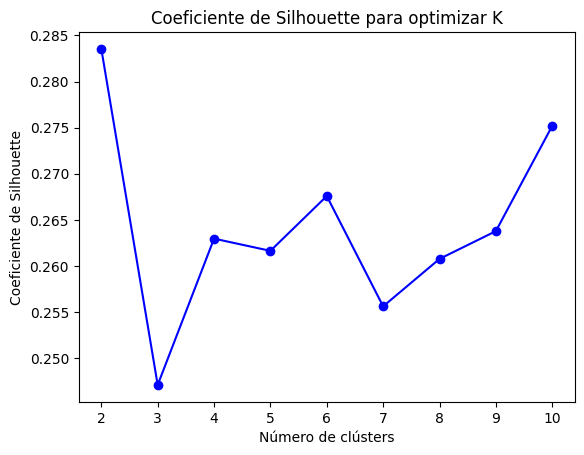

In [ ]:
silhouette_method(x_data)

##K-Means

In [ ]:
from sklearn.cluster import KMeans

#Conjunto completo
kmeans_all = KMeans(n_clusters=2, random_state=42)
clusters_all = kmeans_all.fit_predict(x_data)

#Conjunto con 5 características
kmeans_5 = KMeans(n_clusters=2, random_state=42)
clusters_5 = kmeans_5.fit_predict(x_data_5)

#Conjunto con 3 características
kmeans_3 = KMeans(n_clusters=2, random_state=42)
clusters_3 = kmeans_3.fit_predict(x_data_3)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
#Evaluar los clusters
metrics_all = evaluate_clusters(x_data, clusters_all)
metrics_5 = evaluate_clusters(x_data_5, clusters_5)
metrics_3 = evaluate_clusters(x_data_3, clusters_3)

In [ ]:
cluster_evaluations = {
    'K-means': {
        'metrics_all': metrics_all,
        'metrics_5': metrics_5,
        'metrics_3': metrics_3
    }
}

In [ ]:
Results_kmeans = pd.DataFrame(cluster_evaluations['K-means']).transpose()
Results_kmeans

,Silhouette Score,Davies-Bouldin Score,Calinski-Harabasz Score
metrics_all,0.283532,1.538738,2535.067494
metrics_5,0.437284,1.022627,5833.265662
metrics_3,0.645405,0.604947,15357.431271


In [ ]:
#Crear un Dataframe con los clusters y las clases reales
df_clusters = pd.DataFrame({'Cluster': clusters_3, 'Real Class': y_data})

# Obtener la distribución de clusters
cluster_distribution = df_clusters.groupby('Cluster')['Real Class'].value_counts().unstack(fill_value=0)
cluster_distribution

Real Class,0,1
Cluster,,
0,5924,48
1,490,1681


In [ ]:
#Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_data, clusters_3)
conf_matrix

array([[5924,  490],
       [  48, 1681]])

In [ ]:
accuracy = accuracy_score(y_data, clusters_3)
print(f'Precisión: {accuracy:.2f}')

Precisión: 0.93


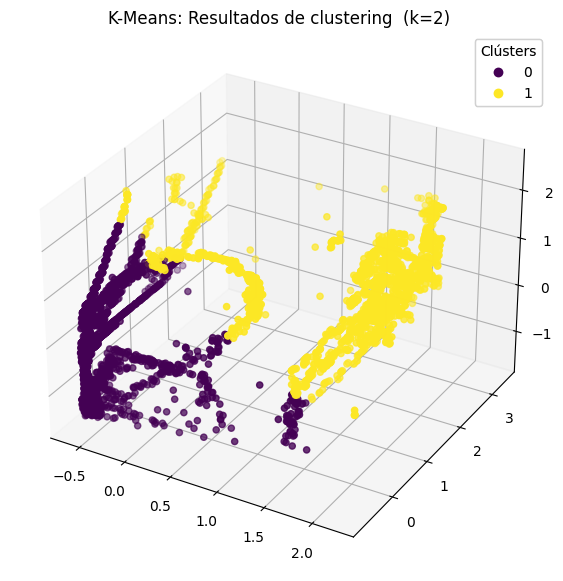

In [ ]:
#gráficar los clusters
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.colors as mcolors

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(x_data_3.iloc[:, 0], x_data_3.iloc[:, 1], x_data_3.iloc[:, 2],
                     c=clusters_3, cmap='viridis', marker='o')

ax.set_title('K-Means: Resultados de clustering  (k=2)')
legend1 = ax.legend(*scatter.legend_elements(), title="Clústers")
ax.add_artist(legend1)

plt.show()


##DBSCAN

In [ ]:
from sklearn.neighbors import NearestNeighbors
neighbors = NearestNeighbors(n_neighbors=6)
neighbors_fit = neighbors.fit(x_data_3)
distances, indices = neighbors_fit.kneighbors(x_data_3)

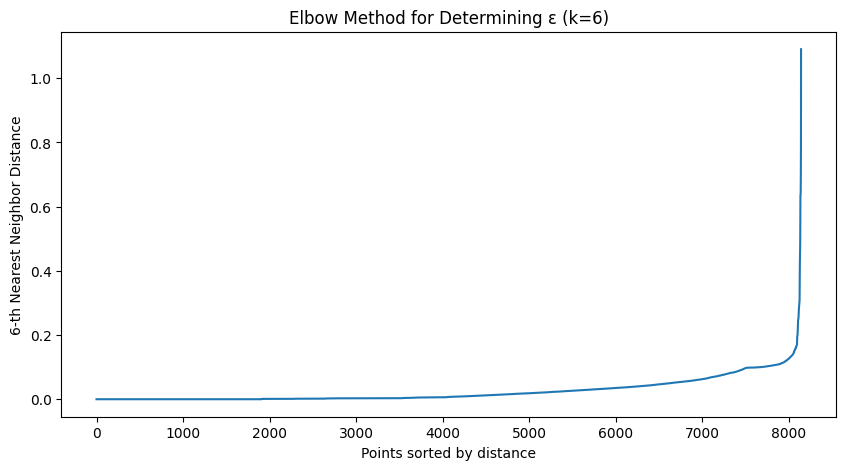

In [ ]:
# Ordenar las distancias y seleccionar la columna correspondiente al 6° vecino
distances = np.sort(distances[:, 5], axis=0)

# Graficar todas las distancias
plt.figure(figsize=(10, 5))
plt.plot(distances)
plt.xlabel('Points sorted by distance')
plt.ylabel('6-th Nearest Neighbor Distance')
plt.title('Elbow Method for Determining ε (k=6)')
plt.show()

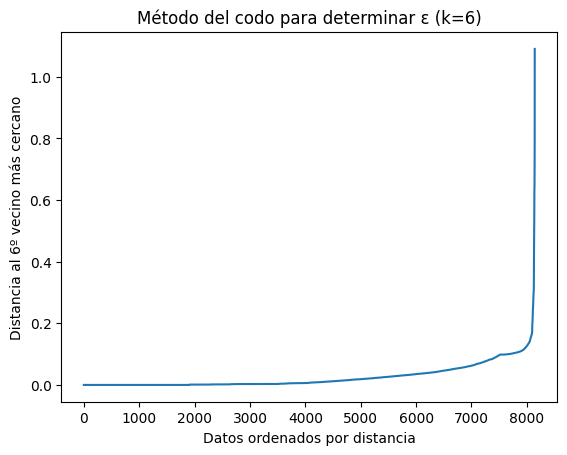

In [ ]:
# Ordenar las distancias
distances_sorted = np.sort(distances, axis=0)

# Graficar las distancias
plt.plot(distances_sorted)
plt.title('Método del codo para determinar ε (k=6)')
plt.xlabel('Datos ordenados por distancia')
plt.ylabel('Distancia al 6º vecino más cercano')
plt.show()

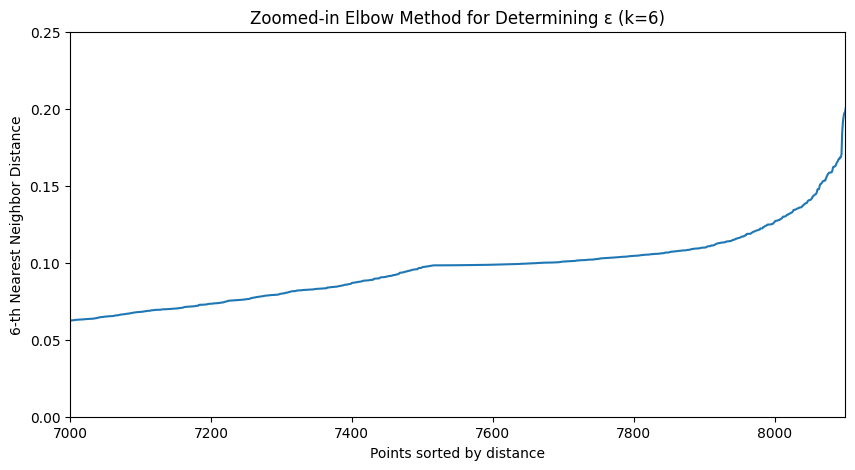

In [ ]:
# Hacer zoom
plt.figure(figsize=(10, 5))
plt.plot(distances)
plt.xlim(7000, 8100)  # Ajusta estos valores para hacer zoom en la región adecuada
plt.ylim(0, 0.25)     # Ajusta el rango del eje y según sea necesario
plt.xlabel('Points sorted by distance')
plt.ylabel('6-th Nearest Neighbor Distance')
plt.title('Zoomed-in Elbow Method for Determining ε (k=6)')
plt.show()

In [ ]:
from sklearn.cluster import DBSCAN
eps_value = 0.15
min_samples_value = 6

dbscan = DBSCAN(eps=eps_value, min_samples=min_samples_value)
clusters_dbscan = dbscan.fit_predict(x_data_3)

In [ ]:
DBSCAN_3= evaluate_clusters(x_data_3, clusters_dbscan)

In [ ]:
cluster_evaluations['DBSCAN'] = {
    'DBSCAN_3': DBSCAN_3
}

results_dbscan = pd.DataFrame(cluster_evaluations['DBSCAN']).transpose()
results_dbscan

,Calinski-Harabasz Score,Davies-Bouldin Score,Silhouette Score
DBSCAN_3,2008.65777,1.115065,0.306794


In [ ]:
df_clusters_dbscan = pd.DataFrame({'Cluster': clusters_dbscan, 'Clases reales': y_data})

# Obtener la distribución de clusters
cluster_distribution_dbscan = df_clusters_dbscan.groupby('Cluster')['Clases reales'].value_counts().unstack(fill_value=0)
cluster_distribution_dbscan

Clases reales,0,1
Cluster,,
-1,28,16
0,0,16
1,6232,0
2,83,1171
3,24,0
4,22,0
5,3,18
6,0,507
7,22,1


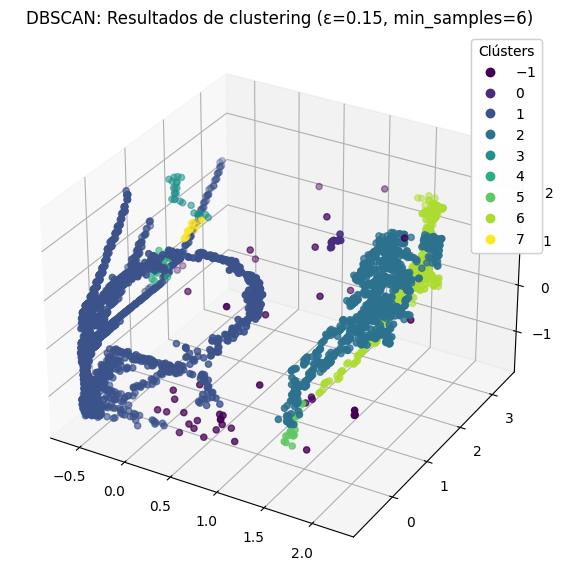

In [ ]:
# Visualización en 3D
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(x_data_3.iloc[:, 0], x_data_3.iloc[:, 1], x_data_3.iloc[:, 2], c=clusters, cmap='viridis', marker='o')

ax.set_title(f'DBSCAN: Resultados de clustering (ε={eps_value}, min_samples={min_samples_value})')
legend = ax.legend(*scatter.legend_elements(), title="Clústers")
ax.add_artist(legend)

plt.show()
